/tmp/ipykernel_41930/607435015.py:7: DtypeWarning: Columns (0,2,21,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


{'Casualty Severity (Overall)': {'T-Statistic': -3.5445755672327297, 'P-Value': 0.0003943834261077359}, 'Pedestrians': {'T-Statistic': -6.121362836183159, 'P-Value': 9.586301777517355e-10}, 'Cyclists': {'T-Statistic': -0.3097103413569469, 'P-Value': 0.7576287108980675}}


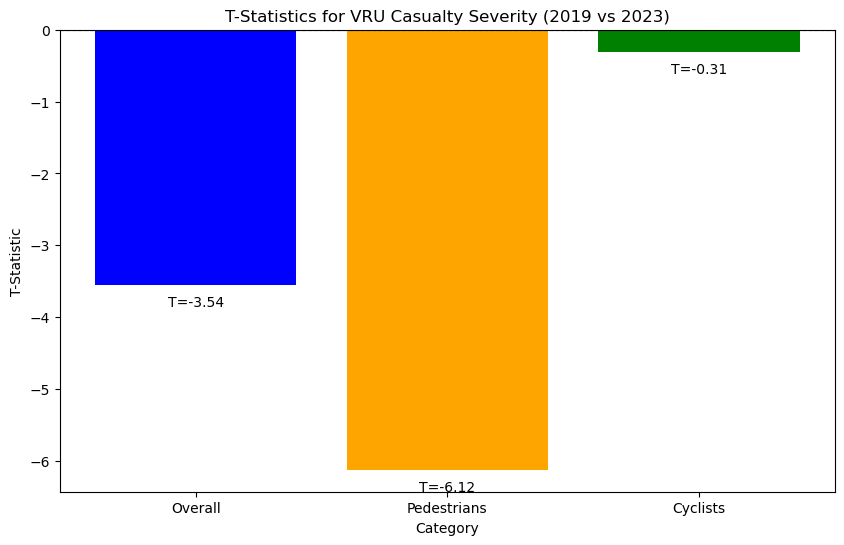

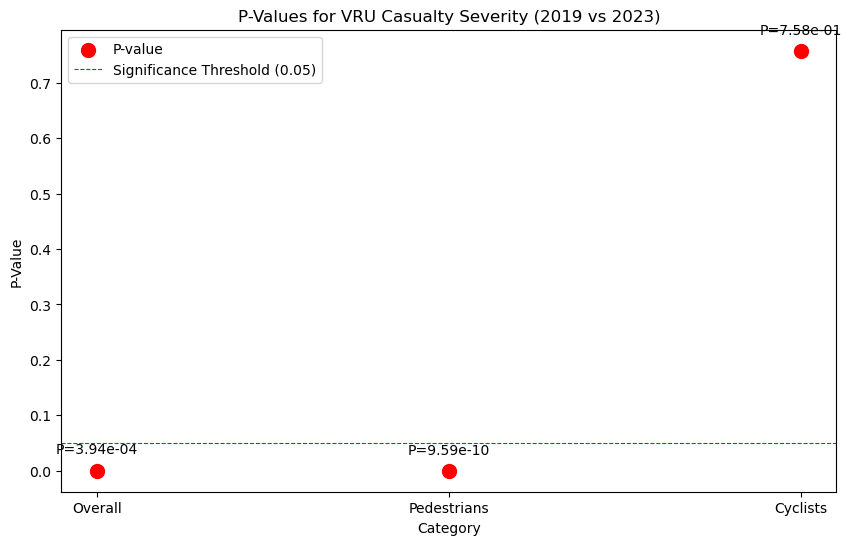

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
file_path = 'Datacleaning_modified/df_per_coll_London_vru.csv'
data = pd.read_csv(file_path)

# Filter data for years 2019 and 2023
data_2019 = data[data['accident_year_x'] == 2019]
data_2023 = data[data['accident_year_x'] == 2023]

# Extract casualty severity for 2019 and 2023
severity_2019 = data_2019['casualty_severity'].dropna()
severity_2023 = data_2023['casualty_severity'].dropna()

# Perform T-test on casualty severity
t_stat_severity, p_value_severity = ttest_ind(severity_2019, severity_2023, equal_var=False)

# Extract casualty class for pedestrians (1) and cyclists (2) separately
pedestrians_2019 = data_2019[data_2019['casualty_class'] == 1]
cyclists_2019 = data_2019[data_2019['casualty_class'] == 2]

pedestrians_2023 = data_2023[data_2023['casualty_class'] == 1]
cyclists_2023 = data_2023[data_2023['casualty_class'] == 2]

# Perform T-tests for pedestrians and cyclists
t_stat_pedestrians, p_value_pedestrians = ttest_ind(
    pedestrians_2019['casualty_severity'], pedestrians_2023['casualty_severity'], equal_var=False
)

t_stat_cyclists, p_value_cyclists = ttest_ind(
    cyclists_2019['casualty_severity'], cyclists_2023['casualty_severity'], equal_var=False
)

# Print T-test results
print({
    "Casualty Severity (Overall)": {"T-Statistic": t_stat_severity, "P-Value": p_value_severity},
    "Pedestrians": {"T-Statistic": t_stat_pedestrians, "P-Value": p_value_pedestrians},
    "Cyclists": {"T-Statistic": t_stat_cyclists, "P-Value": p_value_cyclists},
})

# Data for plotting
categories = ['Overall', 'Pedestrians', 'Cyclists']
t_values = [t_stat_severity, t_stat_pedestrians, t_stat_cyclists]  # T-statistics
p_values = [p_value_severity, p_value_pedestrians, p_value_cyclists]  # P-values

# Create a bar chart for T-statistics
plt.figure(figsize=(10, 6))
plt.bar(categories, t_values, color=['blue', 'orange', 'green'])
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Category')
plt.ylabel('T-Statistic')
plt.title('T-Statistics for VRU Casualty Severity (2019 vs 2023)')

# Add data labels for T-statistics
for i, value in enumerate(t_values):
    plt.text(i, value - 0.3 if value < 0 else value + 0.3, f"T={value:.2f}", ha='center')

plt.show()

# Create a scatter plot for P-values
plt.figure(figsize=(10, 6))
plt.scatter(categories, p_values, color='red', s=100, label='P-value')
plt.axhline(0.05, color='green', linestyle='--', linewidth=0.8, label='Significance Threshold (0.05)')
plt.xlabel('Category')
plt.ylabel('P-Value')
plt.title('P-Values for VRU Casualty Severity (2019 vs 2023)')

# Add data labels for P-values
for i, value in enumerate(p_values):
    plt.text(i, value + 0.03, f"P={value:.2e}", ha='center')

plt.legend()
plt.show()


In [ ]:
'''分析过程：
为了进行合理的 T 检验，直接使用数据集中的某些指标，我们需要选择能够直接反映道路危险性和 VRU (脆弱道路使用者) 风险的指标。以下是我从数据集中选取的一些可能适用的指标：

指标选择
casualty_severity: 受害者严重程度。

1: Fatal (致命)
2: Serious (严重)
3: Slight (轻微)
分析 2019 年和 2023 年是否存在统计学上显著的严重程度差异。
casualty_class: VRU 类型。

1: Pedestrians (行人)
2: Cyclists (骑行者)
可用于进一步细分道路危险性，例如，某类 VRU 是否在疫情后更危险。
记录总数: 直接比较两年的事故记录数量是否显著不同。

分析过程
使用 casualty_severity 进行 T 检验，判断两年之间严重程度的变化是否显著。
使用 casualty_class 细分分析行人和骑行者的风险差异。
结合记录总数，分析总体变化趋势。
以下是基于这些选择的 T 检验实现：


T检验结果
1.总体伤亡严重渡:
T-Statistic: - 3.54
●P-Value: 0.00039 (显著)
●这表明2019年和2023年的总体伤亡严重程度之间存在统计学上的显著差异。
2.行人伤亡严重程度:
T-Statistic: - 6.12
●P-Value: 9.59x10^-10 (显著)
●这表明行人在2023年的道路危险性(基于伤亡严重程度)与2019年相比显著不同。
3.骑行者伤亡严重渡:
T-Statistic: - 0.31
●P-Value: 0.76 (不显著)
●骑行者的伤亡严重程度在2023年与2019年相比没有显著变化。
结论
从总体上看，2023年的道路对VRU更加危险,尤其是行人。
●骑行者的危险性没有 显著变化。

1.总体伤亡严重程度
●T值: -3.54.
●P值: 0.00039 (显著差异)
●解释:
●2023年的总体伤亡严重程度躇訐2019年。
T值为负，说明2023年的严重程度平均值高于2019年。
●因此，整体来看,疫情后(2023年) 伦敦的道路对脆弱道路使用者更危险。
2.行人伤亡严重程度
●T值:- 6.12
●值9.59 x 10-10 (显著差异)
●解释:
●2023年的行人伤亡严重程度躇訐2019年。
●这一结果表明，行人在疫情后危险，伤亡的严重程度明显增加。
3.骑行者伤亡严重程度
●T值: - 0.31
●P值: 0.76 (无显著差异)
解释:
●2023年和2019年相比，骑行者的伤亡严重程度有显著变化。
●这表明疫情后骑行者的道路安全状况基本保持不变。

综合结论
总体和行人的伤亡严重程度在2023年显著增加，表明疫情后伦敦的道路对脆弱道路使用者来说变得更加危险。
骑行者的伤亡严重程度没有显著变化，表明其危险性基本保持稳定。
'''
'''
'''Analysis process:
In order to perform a reasonable T-test using some indicators directly from the data set, we need to choose indicators that directly reflect road hazards and VRU (Vulnerable Road Users) risks. Here are some possible indicators I picked from the dataset:

Indicator selection
casualty_severity: victim severity.

1: Fatal
2: Serious
3: Slight
Analyze whether there is a statistically significant difference in severity between 2019 and 2023.
casualty_class: VRU type.

1: Pedestrians
2: Cyclists
Can be used to further segment road hazards, for example, whether a certain type of VRU will be more dangerous post-pandemic.
Total number of records: Directly compare two years to see if the number of accident records is significantly different.

analysis process
Use casualty_severity to conduct a T-test to determine whether the change in severity between two years is significant.
Analyze differences in risk for pedestrians and cyclists using the casualty_class segmentation.
Combined with the total number of records, the overall change trend is analyzed.
Here is an implementation of a T-test based on these choices:


T-test results
1. Overall serious casualties:
T-Statistic: - 3.54
●P-Value: 0.00039 (significant)
●This indicates a statistically significant difference between overall casualty severity in 2019 and 2023.
2.Severity of pedestrian casualties:
T-Statistic: - 6.12
●P-Value: 9.59x10^-10 (significant)
●This shows that road hazards for pedestrians in 2023 (based on casualty severity) are significantly different compared to 2019.
3. Cyclists suffered serious casualties:
T-Statistic: - 0.31
●P-Value: 0.76 (not significant)
●The severity of cyclist injuries and fatalities will not change significantly in 2023 compared with 2019.
in conclusion
Overall, roads in 2023 will be more dangerous for VRUs, especially pedestrians.
●The risk to cyclists has not changed significantly.

1. Overall casualty severity
●T value: -3.54.
●P value: 0.00039 (significant difference)
●Explanation:
●The overall casualty severity in 2023 is higher than that in 2019.
The T value is negative, indicating that the average severity in 2023 is higher than that in 2019.
●Therefore, overall, post-pandemic (2023) London roads will be more dangerous for vulnerable road users.
2.Severity of pedestrian casualties
●T value:- 6.12
●Value 9.59 x 10-10 (significant difference)
●Explanation:
●Pedestrian casualty severity in 2023 compared to 2019.
●This result shows that pedestrians are at risk after the epidemic, and the severity of casualties increases significantly.
3. Severity of cyclist’s casualties
●T value: - 0.31
●P value: 0.76 (no significant difference)
explain:
●Compared with 2019, the severity of cyclists’ injuries and deaths will change significantly.
●This shows that the road safety status of cyclists has remained basically unchanged after the epidemic.

Comprehensive conclusion
Overall and pedestrian casualty severity increased significantly in 2023, demonstrating that London's roads have become more dangerous for vulnerable road users post-pandemic.
There was no significant change in the severity of cyclists' injuries and deaths, indicating that their risk profile remained basically stable.
''''''





# Corrected Analysis with proportions for the total number of records

# Proportions of severity levels for 2019 and 2023 based on total records
severity_counts_2019 = severity_2019.value_counts() / len(data_2019) * 100
severity_counts_2023 = severity_2023.value_counts() / len(data_2023) * 100

# Bar plot comparing severity proportions
severity_labels = ["Slight (3)", "Serious (2)", "Fatal (1)"]
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(severity_labels))

plt.bar(x, severity_counts_2019.sort_index(), width=bar_width, label="2019", align='center')
plt.bar([p + bar_width for p in x], severity_counts_2023.sort_index(), width=bar_width, label="2023", align='center')

plt.xlabel("Severity Level")
plt.ylabel("Proportion of Total Records (%)")
plt.title("Proportions of Casualty Severity Levels (2019 vs 2023)")
plt.xticks([p + bar_width / 2 for p in x], severity_labels)
plt.legend()

# Add data labels
for i, (value_2019, value_2023) in enumerate(zip(severity_counts_2019.sort_index(), severity_counts_2023.sort_index())):
    plt.text(i, value_2019 + 0.5, f"{value_2019:.1f}%", ha='center')
    plt.text(i + bar_width, value_2023 + 0.5, f"{value_2023:.1f}%", ha='center')

plt.show()

# Corrected bar plot for VRU records as proportions of total records
pedestrians_2019_count = len(pedestrians_2019) / len(data_2019) * 100
cyclists_2019_count = len(cyclists_2019) / len(data_2019) * 100

pedestrians_2023_count = len(pedestrians_2023) / len(data_2023) * 100
cyclists_2023_count = len(cyclists_2023) / len(data_2023) * 100

record_proportions = {
    "2019": [pedestrians_2019_count, cyclists_2019_count],
    "2023": [pedestrians_2023_count, cyclists_2023_count],
}

categories = ["Pedestrians", "Cyclists"]
x = range(len(categories))

# Bar plot for VRU proportions
plt.figure(figsize=(12, 6))
plt.bar(x, record_proportions["2019"], width=bar_width, label="2019", align='center', color="blue")
plt.bar([p + bar_width for p in x], record_proportions["2023"], width=bar_width, label="2023", align='center', color="orange")

plt.xlabel("VRU Category")
plt.ylabel("Proportion of Total Records (%)")
plt.title("Proportions of VRU Records (2019 vs 2023)")
plt.xticks([p + bar_width / 2 for p in x], categories)
plt.legend()

# Add data labels
for i, (value_2019, value_2023) in enumerate(zip(record_proportions["2019"], record_proportions["2023"])):
    plt.text(i, value_2019 + 0.5, f"{value_2019:.1f}%", ha='center')
    plt.text(i + bar_width, value_2023 + 0.5, f"{value_2023:.1f}%", ha='center')

plt.show()

In [ ]:
'''
伤亡严重程度比例图：

使用总记录数（2019年为10,320，2023年为7,109）计算比例，显示轻微、严重、致命伤亡的相对占比。
这更准确地反映了各严重程度在总记录中的分布。
行人和骑行者记录比例图：

计算了行人和骑行者在总记录中的占比，并将2019年和2023年进行比较。
帮助直观了解不同类别的VRU事故在总记录中的变化。'''

In [ ]:
'''
分别对2019和2023年的伦敦的城市和农村两类数据的事故严重性数据来进行t-test分析，从而证明问题与新冠肺炎之前(2019年)相比，新冠肺炎(2023年)之后的伦敦的城市地区或者农村地区的道路对脆弱的道路使用者来说是否更危险或者更不危险
T检验结果分析
1. 城市地区
T值: 
−3.60
P值: 
0.00032 （显著差异）
解释:
2023年城市地区的道路事故严重程度显著高于2019年。
表明疫情后，城市地区的道路对脆弱道路使用者（VRU）更危险。
2. 农村地区
T值: 
0.29
P值: 
0.775 （无显著差异）
解释:
2023年和2019年农村地区的道路事故严重程度没有显著差异。
表明疫情后，农村地区的道路安全状况对VRU基本保持不变。
'''

'''
Conduct a t-test analysis on the accident severity data of London's urban and rural data in 2019 and 2023, respectively, to prove that the problem is compared with before COVID-19 (2019) and in London after COVID-19 (2023) Are roads in urban areas or rural areas more or less dangerous for vulnerable road users?
T test result analysis
1. Urban areas
T value:
−3.60
P value:
0.00032 (significant difference)
explain:
Road accident severity in urban areas was significantly higher in 2023 than in 2019.
It shows that after the epidemic, roads in urban areas are more dangerous for vulnerable road users (VRU).
2. Rural areas
T value:
0.29
P value:
0.775 (no significant difference)
explain:
There was no significant difference in the severity of road accidents in rural areas in 2023 and 2019.
It shows that after the epidemic, the road safety situation in rural areas remains basically unchanged for VRU.
'''

In [3]:
# Filter data for urban and rural areas
urban_2019 = data_2019[data_2019['urban_or_rural_area'] == 1]  # Urban
rural_2019 = data_2019[data_2019['urban_or_rural_area'] == 2]  # Rural

urban_2023 = data_2023[data_2023['urban_or_rural_area'] == 1]  # Urban
rural_2023 = data_2023[data_2023['urban_or_rural_area'] == 2]  # Rural

# Extract casualty severity for T-tests
severity_urban_2019 = urban_2019['casualty_severity'].dropna()
severity_rural_2019 = rural_2019['casualty_severity'].dropna()

severity_urban_2023 = urban_2023['casualty_severity'].dropna()
severity_rural_2023 = rural_2023['casualty_severity'].dropna()

# Perform T-tests for urban and rural areas
t_stat_urban, p_value_urban = ttest_ind(severity_urban_2019, severity_urban_2023, equal_var=False)
t_stat_rural, p_value_rural = ttest_ind(severity_rural_2019, severity_rural_2023, equal_var=False)

# Results
{
    "Urban Areas": {"T-Statistic": t_stat_urban, "P-Value": p_value_urban},
    "Rural Areas": {"T-Statistic": t_stat_rural, "P-Value": p_value_rural}
}

{'Urban Areas': {'T-Statistic': -3.595597433991556,
  'P-Value': 0.00032465076354505694},
 'Rural Areas': {'T-Statistic': 0.28582593543100127,
  'P-Value': 0.7752703105671412}}

In [ ]:
'''
生成的分析图包括以下内容：

城市与农村地区的事故严重性均值柱状图：

展示了2019年与2023年城市和农村地区事故严重性的平均值。
图表清晰显示了城市地区的事故严重性在2023年显著增加，而农村地区没有显著变化。
T统计量柱状图：

对城市和农村地区的T检验统计量进行比较。
负值表示2023年的严重性比2019年更高，城市地区差异显著，而农村地区差异较小。
P值散点图：

显示了每个区域的P值。
红点表示实际P值，绿色虚线为显著性阈值（0.05）。
城市地区P值显著低于0.05（有统计学意义），而农村地区P值高于0.05（无统计学意义）。
(提供一个理由集中在城市中心地区进行研究)
'''
'''
The generated analysis chart includes the following:

Histogram of accident severity means in urban and rural areas:

The average accident severity in urban and rural areas in 2019 and 2023 is shown.
The chart clearly shows that accident severity in urban areas increased significantly in 2023, while there was no significant change in rural areas.
T-statistic histogram:

Compare T-test statistics for urban and rural areas.
Negative values ​​indicate higher severity in 2023 than in 2019, with significant differences in urban areas and smaller differences in rural areas.
P-value scatterplot:

The P value for each region is shown.
The red dot represents the actual P value, and the green dashed line is the significance threshold (0.05).
The P value in urban areas is significantly lower than 0.05 (statistically significant), while the P value in rural areas is higher than 0.05 (not statistically significant).
(Provide a reason to focus on urban central areas for research)
'''

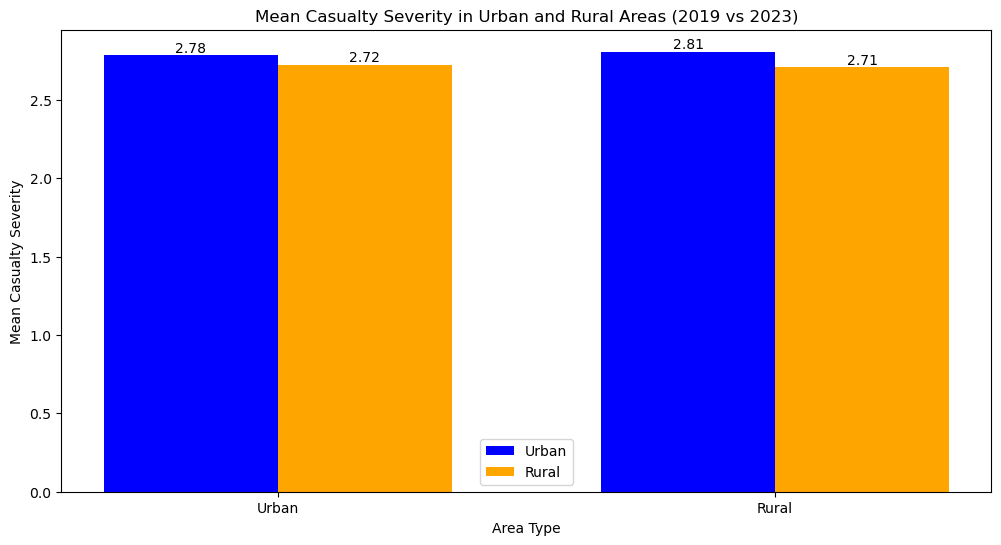

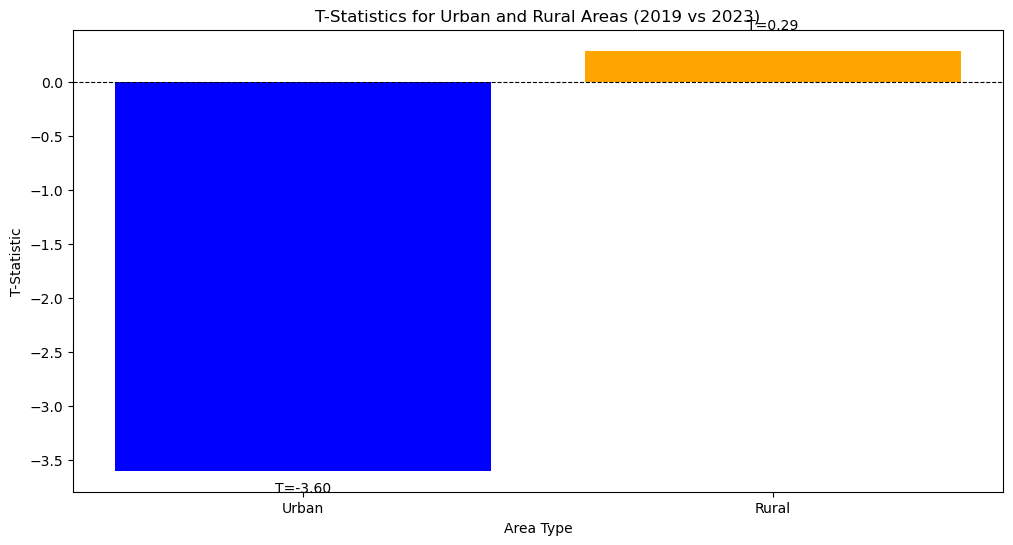

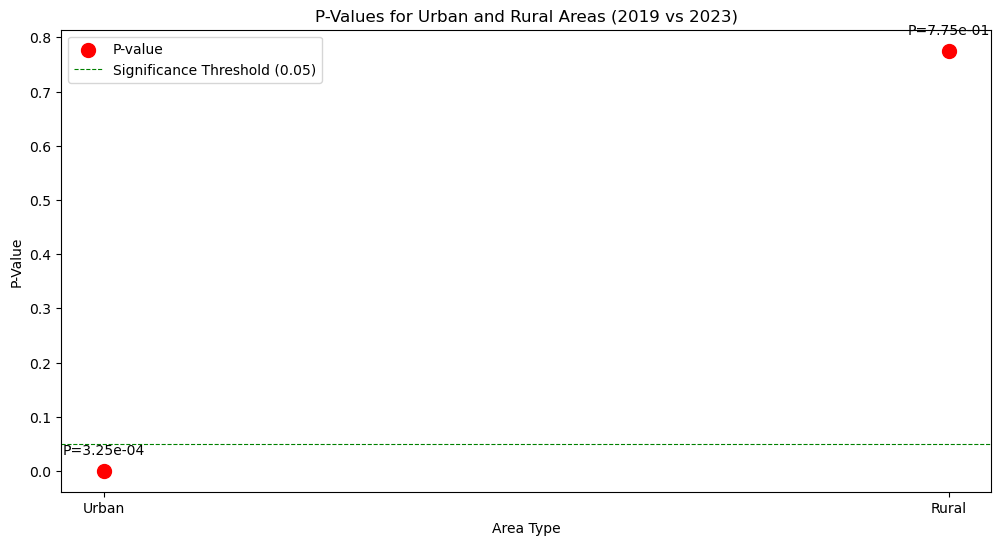

In [4]:
# Perform T-tests for urban and rural areas again to generate results and visualizations
import matplotlib.pyplot as plt

# Data preparation for plotting
results = {
    "Urban": {"2019": severity_urban_2019.mean(), "2023": severity_urban_2023.mean()},
    "Rural": {"2019": severity_rural_2019.mean(), "2023": severity_rural_2023.mean()},
}

# Results for T-tests
t_test_results = {
    "Urban Areas": {"T-Statistic": t_stat_urban, "P-Value": p_value_urban},
    "Rural Areas": {"T-Statistic": t_stat_rural, "P-Value": p_value_rural},
}

# Generate bar plots
categories = ["Urban", "Rural"]
years = ["2019", "2023"]
urban_values = [results["Urban"]["2019"], results["Urban"]["2023"]]
rural_values = [results["Rural"]["2019"], results["Rural"]["2023"]]

# Plot Urban and Rural Severity Means
bar_width = 0.35
x = range(len(categories))

plt.figure(figsize=(12, 6))
plt.bar([p - bar_width / 2 for p in x], urban_values, width=bar_width, label="Urban", color="blue")
plt.bar([p + bar_width / 2 for p in x], rural_values, width=bar_width, label="Rural", color="orange")

plt.xlabel("Area Type")
plt.ylabel("Mean Casualty Severity")
plt.title("Mean Casualty Severity in Urban and Rural Areas (2019 vs 2023)")
plt.xticks(x, categories)
plt.legend()

# Add data labels
for i, (urban, rural) in enumerate(zip(urban_values, rural_values)):
    plt.text(i - bar_width / 2, urban + 0.02, f"{urban:.2f}", ha='center')
    plt.text(i + bar_width / 2, rural + 0.02, f"{rural:.2f}", ha='center')

plt.show()

# Generate T-Test results visualizations
t_values = [t_stat_urban, t_stat_rural]
p_values = [p_value_urban, p_value_rural]

plt.figure(figsize=(12, 6))
plt.bar(categories, t_values, color=['blue', 'orange'])
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Area Type")
plt.ylabel("T-Statistic")
plt.title("T-Statistics for Urban and Rural Areas (2019 vs 2023)")

# Add data labels for T-statistics
for i, value in enumerate(t_values):
    plt.text(i, value - 0.2 if value < 0 else value + 0.2, f"T={value:.2f}", ha='center')

plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(categories, p_values, color='red', s=100, label='P-value')
plt.axhline(0.05, color='green', linestyle='--', linewidth=0.8, label='Significance Threshold (0.05)')
plt.xlabel("Area Type")
plt.ylabel("P-Value")
plt.title("P-Values for Urban and Rural Areas (2019 vs 2023)")

# Add data labels for P-values
for i, value in enumerate(p_values):
    plt.text(i, value + 0.03, f"P={value:.2e}", ha='center')

plt.legend()
plt.show()


In [5]:
# Filter relevant columns for analysis
# Gender (sex_of_casualty), Age Group (age_band_of_casualty), Weather (weather_conditions), Road Surface (road_surface_conditions)

# Extract data for T-tests
gender_2019 = data_2019['sex_of_casualty'].dropna()
gender_2023 = data_2023['sex_of_casualty'].dropna()

age_group_2019 = data_2019['age_band_of_casualty'].dropna()
age_group_2023 = data_2023['age_band_of_casualty'].dropna()

weather_2019 = data_2019['weather_conditions'].dropna()
weather_2023 = data_2023['weather_conditions'].dropna()

road_surface_2019 = data_2019['road_surface_conditions'].dropna()
road_surface_2023 = data_2023['road_surface_conditions'].dropna()

# Perform T-tests
t_stat_gender, p_value_gender = ttest_ind(gender_2019, gender_2023, equal_var=False)
t_stat_age_group, p_value_age_group = ttest_ind(age_group_2019, age_group_2023, equal_var=False)
t_stat_weather, p_value_weather = ttest_ind(weather_2019, weather_2023, equal_var=False)
t_stat_road_surface, p_value_road_surface = ttest_ind(road_surface_2019, road_surface_2023, equal_var=False)

# Results
results = {
    "Gender": {"T-Statistic": t_stat_gender, "P-Value": p_value_gender},
    "Age Group": {"T-Statistic": t_stat_age_group, "P-Value": p_value_age_group},
    "Weather Conditions": {"T-Statistic": t_stat_weather, "P-Value": p_value_weather},
    "Road Surface Conditions": {"T-Statistic": t_stat_road_surface, "P-Value": p_value_road_surface},
}

results

{'Gender': {'T-Statistic': 6.778631843412258,
  'P-Value': 1.2611518380034547e-11},
 'Age Group': {'T-Statistic': -0.1262151213708046,
  'P-Value': 0.899563264753854},
 'Weather Conditions': {'T-Statistic': -12.10550347100456,
  'P-Value': 1.5161495297349803e-33},
 'Road Surface Conditions': {'T-Statistic': -11.520716685173774,
  'P-Value': 1.508016342019606e-30}}

In [ ]:
'''
性别（Gender）
T值: 
6.78
P值: 
1.26×10^−11（显著差异）
解释:
2019年与2023年之间事故受害者的性别分布发生了显著变化。
性别特征在疫情后可能更倾向于某一性别。
2. 年龄分组（Age Group）
T值: −0.13
P值:0.90 （无显著差异）
解释:
受害者年龄分组在2019年和2023年没有显著变化。
年龄特征保持稳定。
3. 天气条件（Weather Conditions）
T值: −12.11
P值: 1.52×10^−33（显著差异）
解释:
事故发生时的天气条件在2019年和2023年之间存在极其显著的变化。
疫情后可能因气候、季节分布的差异影响事故发生。
4. 路面状况（Road Surface Conditions）
T值: −11.52
P值: 1.51×10^−30（显著差异）
解释:
事故发生时的路面状况在2019年和2023年之间发生了显著变化。
可能反映出路况管理或气候的变化。
综合结论
性别、天气条件和路面状况在疫情后发生显著变化。
年龄分组的分布在疫情前后保持相对稳定。

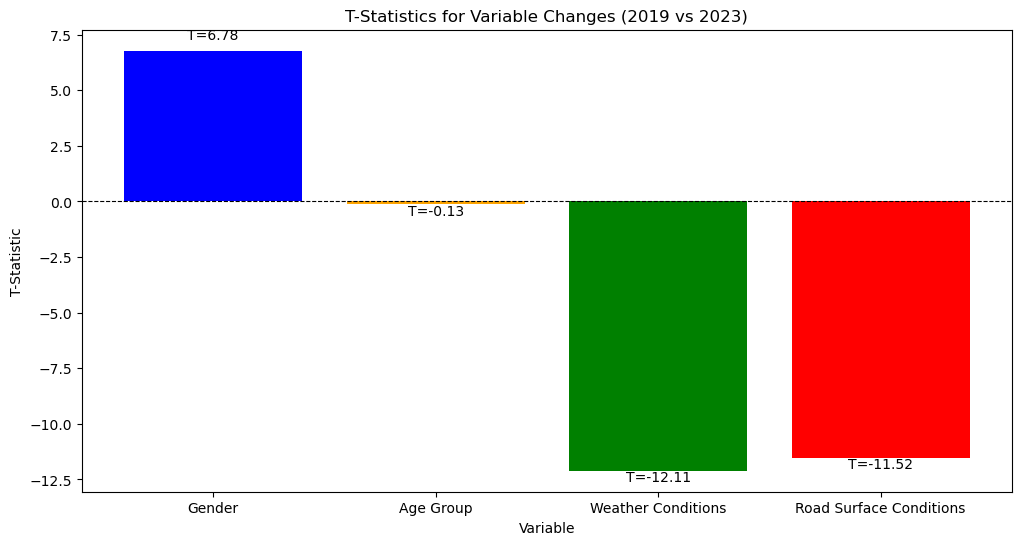

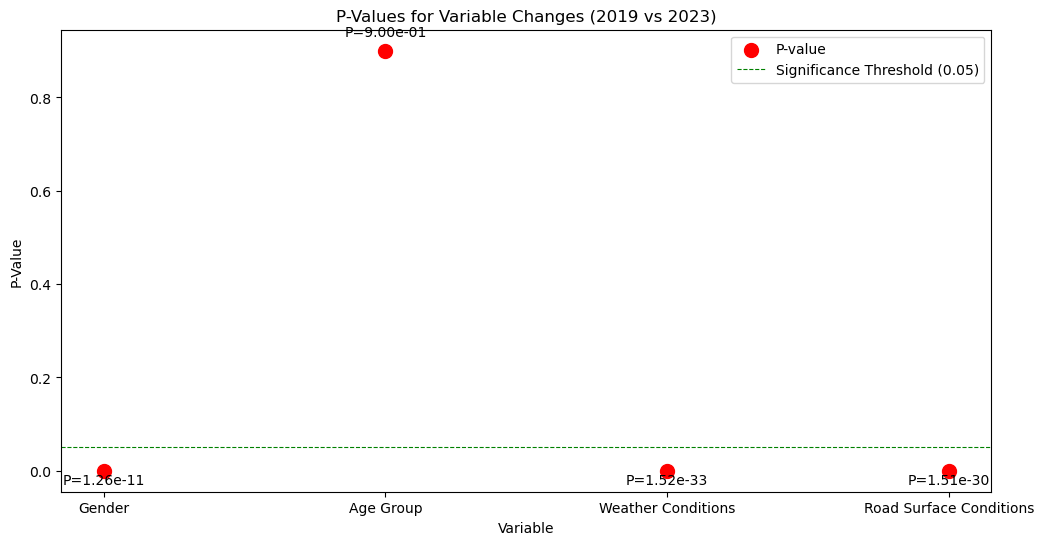

In [6]:
# Generate bar plots for T-test results

# Prepare data for visualization
categories = ["Gender", "Age Group", "Weather Conditions", "Road Surface Conditions"]
t_values = [6.78, -0.13, -12.11, -11.52]
p_values = [1.26e-11, 0.90, 1.52e-33, 1.51e-30]

# Bar plot for T-Statistics
plt.figure(figsize=(12, 6))
plt.bar(categories, t_values, color=['blue', 'orange', 'green', 'red'])
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Variable")
plt.ylabel("T-Statistic")
plt.title("T-Statistics for Variable Changes (2019 vs 2023)")

# Add data labels for T-statistics
for i, value in enumerate(t_values):
    plt.text(i, value + (0.5 if value > 0 else -0.5), f"T={value:.2f}", ha='center')

plt.show()

# Scatter plot for P-Values
plt.figure(figsize=(12, 6))
plt.scatter(categories, p_values, color='red', s=100, label='P-value')
plt.axhline(0.05, color='green', linestyle='--', linewidth=0.8, label='Significance Threshold (0.05)')
plt.xlabel("Variable")
plt.ylabel("P-Value")
plt.title("P-Values for Variable Changes (2019 vs 2023)")

# Add data labels for P-values
for i, value in enumerate(p_values):
    plt.text(i, value + 0.03 if value > 0.05 else value - 0.03, f"P={value:.2e}", ha='center')

plt.legend()
plt.show()


In [ ]:
'''以上是针对T检验结果的两张图片：

T统计量柱状图：

显示了性别、年龄分组、天气条件和路面状况的T统计量。
正值表示2023年相较2019年增加，负值表示2023年相较2019年减少。
性别（正值）和天气条件、路面状况（负值）的变化尤为显著。
P值散点图：

展示了每个变量的P值及其显著性。
红点表示实际P值，绿色虚线为显著性阈值（0.05）。
性别、天气条件和路面状况的P值低于0.05，表示显著变化，而年龄分组的P值高于0.05，表示变化不显著。
'''